In [1]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Linear regression the bayesian way
- code borrowed from https://www.youtube.com/watch?v=SP-sAAYvGT8

In [2]:
# Generate data points
true_slope = 5
true_intercept = 10
true_sigma = 1

num_points = 10

x_vals = np.linspace(0, 1, num_points)
true_y_vals = true_slope * x_vals + true_intercept

# Observed y values are true values plus noise
y_vals = true_y_vals + np.random.normal(scale=true_sigma, size=num_points)

true_params = {"slope": true_slope, "intercept": true_intercept,
               "sigma": true_sigma}

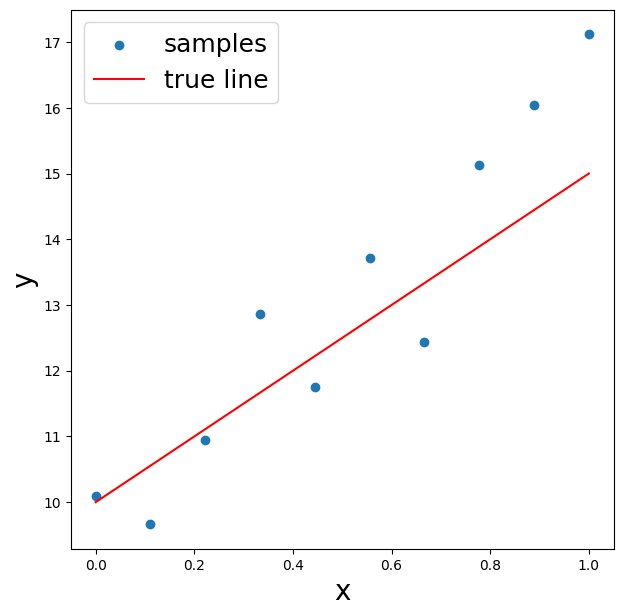

In [3]:
# Plot generated data
plt.figure(figsize=(7,7,))
p1 = plt.scatter(x_vals, y_vals)
p2, = plt.plot(x_vals, true_y_vals, color="r")
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.legend((p1,p2), ('samples', 'true line'), fontsize=18)

In [4]:
# Fit linear model with MLE-Estimation / Point estimates
clf = LinearRegression()
clf.fit(x_vals.reshape(-1,1), y_vals)
preds = clf.predict(x_vals.reshape(-1,1))
resids = preds - y_vals

print('True Model:')
print('y_true = %s*x + %s'%(true_slope, true_intercept))
print('True sigma: %s\n'%true_params['sigma'])

print('Estimated Model:')
print('y_hat = %s*x + %s'%(clf.coef_[0], clf.intercept_))
print('Sd Residuals: %s'%(resids.std()))

mle_estimates = {'slope': clf.coef_[0], 'intercept': clf.intercept_, 'sigma': resids.std()}

True Model:
y_true = 5*x + 10
True sigma: 1

Estimated Model:
y_hat = 7.063084949442042*x + 9.446451871470913
Sd Residuals: 0.7845197340220196


In [5]:
# Model with pymc
with pm.Model() as model:
    #priors
    #sigma = pm.Exponential("sigma", lam=1.0)
    sigma = pm.HalfCauchy('sigma', 0.5)
    intercept = pm.Normal("intercept", mu=0, sigma=20)
    slope = pm.Normal("slope", mu=0, sigma=20)

    #Likelihood
    likelihood = pm.Normal("y", mu=slope*x_vals + intercept, sigma=sigma, observed=y_vals)

    #posterior
    trace = pm.sample(1000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, intercept, slope]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


<Figure size 700x700 with 0 Axes>

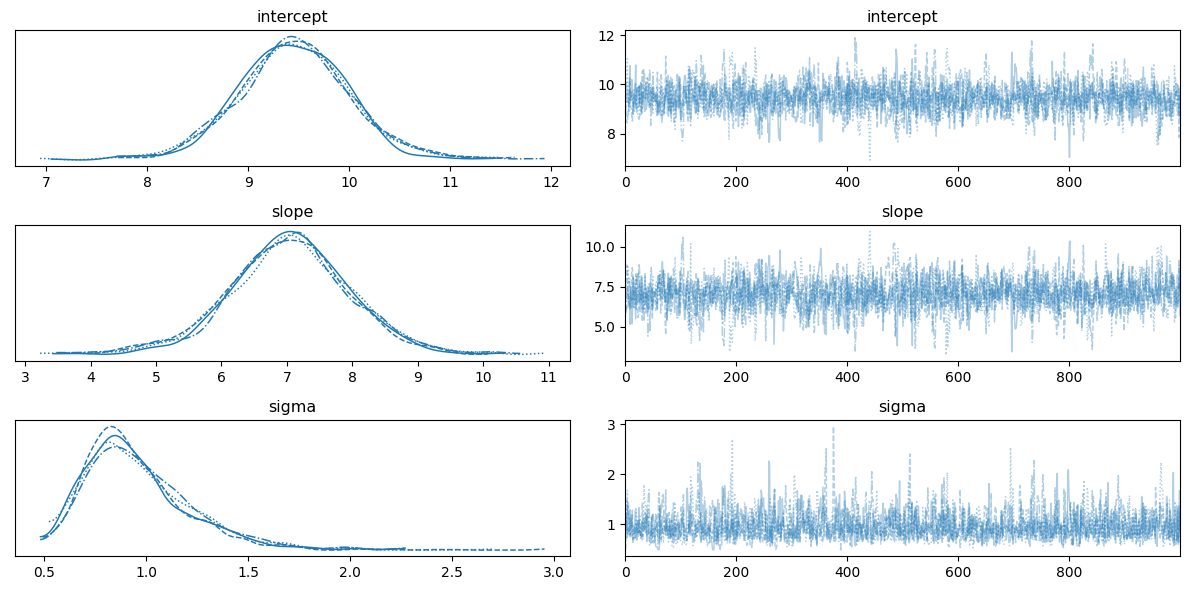

In [6]:
plt.figure(figsize=(7, 7))
pm.plot_trace(trace)
plt.tight_layout()

# Plot different priors

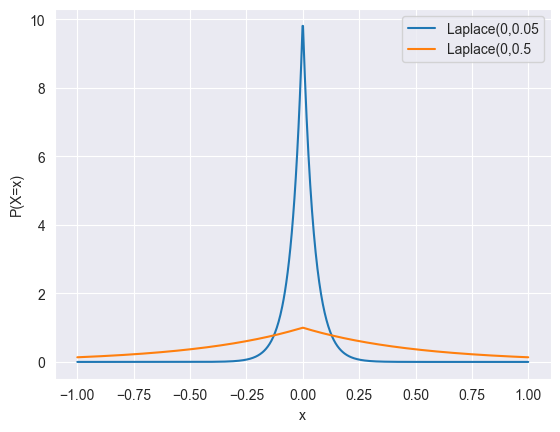

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')
mu, s = 0, [0.05,0.5]
x = np.linspace(-1, 1, 1000)

for i in s:
    y = np.exp(-np.abs(x-mu)/i)/(2*i)

    plt.plot(x, y, label=f'Laplace({mu},{i}')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('P(X=x)')
plt.show()

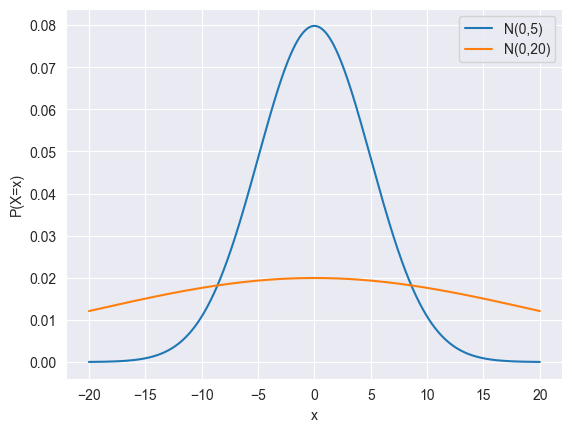

In [16]:
import scipy.stats as stats


mu, sigma = 0, [5, 20]
x = np.linspace(-20, 20, 1000)

for i in sigma:
    y = stats.norm.pdf(x, mu, i)

    plt.plot(x, y, label=f'N({mu},{i})')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('P(X=x)')
plt.show()